<a href="https://colab.research.google.com/github/shetehm/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Harsh_Colab_Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [ ]:
# Importing the libraries
import pandas as pd
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
corona_tweet_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project/Coronavirus_Tweets.csv', encoding= 'ISO-8859-1')

##**Knowing the Dataset**

In [ ]:
corona_tweet_df.shape

(41157, 6)

In [ ]:
corona_tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
corona_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
corona_tweet_df.groupby('Location')['UserName'].count()

Location
                                     4
      Texas                          1
  170825 ? shinee ? svt ? vixx       1
  UK to Detroit Worldwide            1
  VA - TX - ??- Belgium??            1
                                    ..
ÃT: 54.975455,-1.595362             1
ÃT: 59.19408,17.620422              1
Ã  l'Ã©chelle mondiale               1
Ã­ ?Ã­?? Ã­? ? ????? ?????? ?????    1
Ã¯? ???????'? ?????????              1
Name: UserName, Length: 12220, dtype: int64

In [ ]:
corona_tweet_df.groupby('Sentiment')['UserName'].count()

Sentiment
Extremely Negative     5481
Extremely Positive     6624
Negative               9917
Neutral                7713
Positive              11422
Name: UserName, dtype: int64

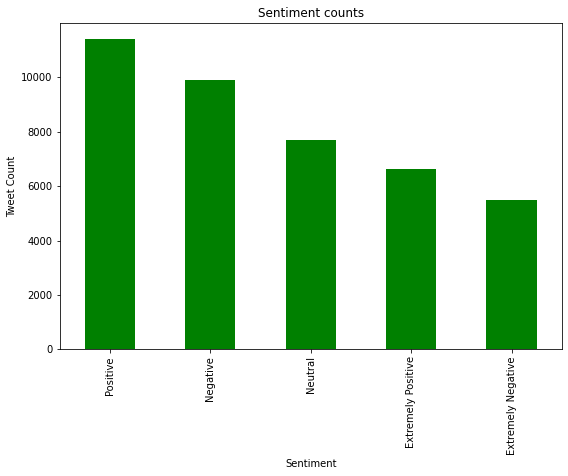

In [ ]:
counts = corona_tweet_df['Sentiment'].value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
counts.plot.bar(ax = ax, color='green')
ax.set_title('Sentiment counts')
ax.set_xlabel('Sentiment') 
ax.set_ylabel("Tweet Count")
plt.show()

In [ ]:
corona_tweet_df.groupby('TweetAt')['UserName'].count()

TweetAt
01-04-2020     630
02-04-2020     954
03-04-2020     810
04-04-2020     767
05-04-2020    1131
06-04-2020    1742
07-04-2020    1843
08-04-2020    1881
09-04-2020    1471
10-04-2020    1005
11-04-2020     909
12-04-2020     803
13-04-2020    1428
14-04-2020     284
16-03-2020     656
17-03-2020    1977
18-03-2020    2742
19-03-2020    3215
20-03-2020    3448
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
24-03-2020    1480
25-03-2020    2979
26-03-2020    1277
27-03-2020     345
28-03-2020      23
29-03-2020     125
30-03-2020      87
31-03-2020     316
Name: UserName, dtype: int64

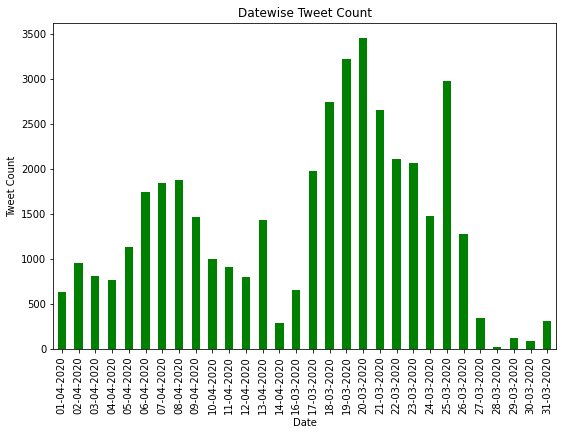

In [ ]:
counts = corona_tweet_df['TweetAt'].value_counts().sort_index()
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
counts.plot.bar(ax = ax, color='green')
ax.set_title('Datewise Tweet Count')
ax.set_xlabel('Date') 
ax.set_ylabel('Tweet Count')
plt.show()

In [ ]:
corona_tweet_df.groupby('Location')['UserName'].count().sort_values(ascending=False).head(15)

Location
London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
England, United Kingdom    191
Canada                     191
Toronto, Ontario           160
Global                     159
Name: UserName, dtype: int64

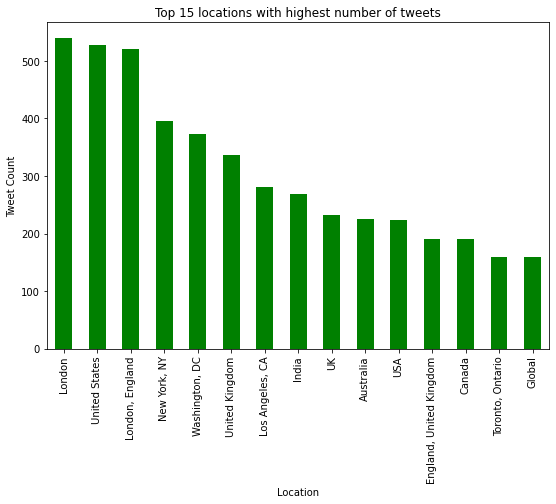

In [ ]:
counts = corona_tweet_df['Location'].value_counts().sort_values(ascending=False).head(15)
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
counts.plot.bar(ax = ax, color='green')
ax.set_title('Top 15 locations with highest number of tweets')
ax.set_xlabel('Location') 
ax.set_ylabel('Tweet Count')
plt.show()

In [ ]:
#Handling the NULL values
#Calculating the percentage of NULL of values in each column
total = corona_tweet_df.isnull().sum().sort_values(ascending=False)
percent = (corona_tweet_df.isnull().sum()/corona_tweet_df.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Location,8590,20.871298
Sentiment,0,0.000000
OriginalTweet,0,0.000000
TweetAt,0,0.000000
ScreenName,0,0.000000
UserName,0,0.000000


Only 'Location' column has 20.9%`null values and all other columns have 0 null values. As the 'Location' column will not be used for analysis, need not to worry about it.

In [ ]:
len(corona_tweet_df[corona_tweet_df.duplicated()])

0

There are no duplicate records in the dataset.

## **Data Preparation**
In case of tweet sentiment analysis following steps will be followed to prepare the data.
1. Removing Twitter handles/ user names
2. Removing URL links
3. Removing # symbols and retaining the tags
4. Removing Punctuations and stop words
5. Removing short words
6. Tokenization and stemming

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
corona_tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [ ]:
def remove_pattern(tweet_text, pattern):
  tweet_text= re.sub(pattern, ' ', tweet_text)
  return tweet_text

In [ ]:
#Removing the twitter handles
corona_tweet_df['OriginalTweet']= corona_tweet_df.apply(lambda x: remove_pattern(x['OriginalTweet'], '@[\w]*'), axis= 1)

In [ ]:
corona_tweet_df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,"As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, reports https://t.co/cfXch7a2lU",Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,"Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented ""I'm in Civics class so I know what I'm talking about"". https://t.co/ieFDNeHgDO",Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,"Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business or classes for the next two weeks, beginning Monday, March 16. We will continue to process online and phone orders as normal! Thank you for your understanding! https://t.co/kw91zJ5O5i",Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona",Negative


In [ ]:
#Removing hyperlinks
corona_tweet_df['OriginalTweet']= corona_tweet_df.apply(lambda x: remove_pattern(x['OriginalTweet'], 'https?://[A-Za-z0-9./]+'), axis= 1)

In [ ]:
corona_tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,and and,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement",Extremely Negative


In [ ]:
#Remocing '#' symbols
corona_tweet_df['OriginalTweet']= corona_tweet_df.apply(lambda x: remove_pattern(x['OriginalTweet'], '#'), axis= 1)

In [ ]:
corona_tweet_df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,and and,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\nCOVID19france COVID_19 COVID19 coronavirus confinement Confinementotal ConfinementGeneral",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\nCoronavirusFrance restezchezvous StayAtHome confinement",Extremely Negative


In [ ]:
#Removing punctuations, numbers and special characters
corona_tweet_df['OriginalTweet']= corona_tweet_df.apply(lambda x: remove_pattern(x['OriginalTweet'], '[^a-zA-Z#]'), axis= 1)

In [ ]:
corona_tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,and and,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia Woolworths to give elderly disabled dedicated shopping hours amid COVID outbreak,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is empty PLEASE don t panic THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need Stay calm stay safe COVID france COVID COVID coronavirus confinement Confinementotal ConfinementGeneral,Positive
4,3803,48755,NaN,16-03-2020,Me ready to go at supermarket during the COVID outbreak Not because I m paranoid but because my food stock is litteraly empty The coronavirus is a serious thing but please don t panic It causes shortage CoronavirusFrance restezchezvous StayAtHome confinement,Extremely Negative


In [ ]:
#Removing Stop-words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
len(stop)

179

In [ ]:
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
corona_tweet_df['OriginalTweet']= corona_tweet_df.apply(lambda x: remove_stopwords(x['OriginalTweet']), axis= 1)

In [ ]:
corona_tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,,Neutral
1,3800,48752,UK,16-03-2020,advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist gp set online shopping accounts poss adequate supplies regular meds order,Positive
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid outbreak,Positive
3,3802,48754,NaN,16-03-2020,food stock one empty please panic enough food everyone take need stay calm stay safe covid france covid covid coronavirus confinement confinementotal confinementgeneral,Positive
4,3803,48755,NaN,16-03-2020,ready go supermarket covid outbreak paranoid food stock litteraly empty coronavirus serious thing please panic causes shortage coronavirusfrance restezchezvous stayathome confinement,Extremely Negative


In [ ]:
#Removing words with short length (less than 3 letters)
corona_tweet_df['OriginalTweet'] = corona_tweet_df['OriginalTweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
corona_tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,,Neutral
1,3800,48752,UK,16-03-2020,advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist online shopping accounts poss adequate supplies regular meds order,Positive
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid outbreak,Positive
3,3802,48754,NaN,16-03-2020,food stock empty please panic enough food everyone take need stay calm stay safe covid france covid covid coronavirus confinement confinementotal confinementgeneral,Positive
4,3803,48755,NaN,16-03-2020,ready supermarket covid outbreak paranoid food stock litteraly empty coronavirus serious thing please panic causes shortage coronavirusfrance restezchezvous stayathome confinement,Extremely Negative


In [ ]:
#Tokanizing
corona_tweet_df['OriginalTweet'] = corona_tweet_df['OriginalTweet'].apply(lambda x: x.split())

In [ ]:
#Stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
corona_tweet_df['OriginalTweet'] = corona_tweet_df['OriginalTweet'].apply(lambda x: [stemmer.stem(i) for i in x])

In [ ]:
# join tokens into one sentence
def join_tokens(tokenized_tweet):
  sentence= ''
  for i in range(len(tokenized_tweet)):
    sentence = sentence + ' ' +tokenized_tweet[i]
  return sentence

In [ ]:
#Joining the tokens to make a sentence
corona_tweet_df['OriginalTweet']= corona_tweet_df.apply(lambda x: join_tokens(x['OriginalTweet']), axis=1)

In [ ]:
corona_tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,,Neutral
1,3800,48752,UK,16-03-2020,advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist onlin shop account poss adequ suppli regular med order,Positive
2,3801,48753,Vagabonds,16-03-2020,coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak,Positive
3,3802,48754,NaN,16-03-2020,food stock empti pleas panic enough food everyon take need stay calm stay safe covid franc covid covid coronaviru confin confinementot confinementgener,Positive
4,3803,48755,NaN,16-03-2020,readi supermarket covid outbreak paranoid food stock litterali empti coronaviru seriou thing pleas panic caus shortag coronavirusfr restezchezv stayathom confin,Extremely Negative


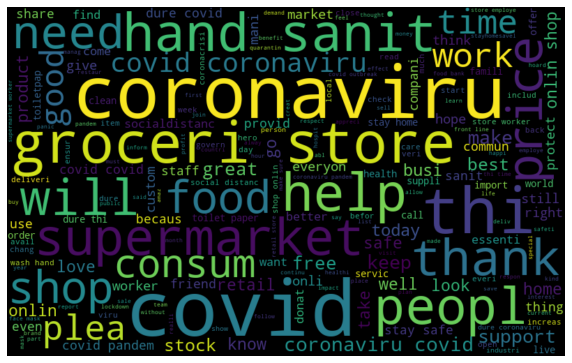

In [ ]:
#Generating a word cloud for Extremely positive tweets
from wordcloud import WordCloud

positive_words = ' '.join([text for text in corona_tweet_df['OriginalTweet'][corona_tweet_df['Sentiment'] == 'Extremely Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

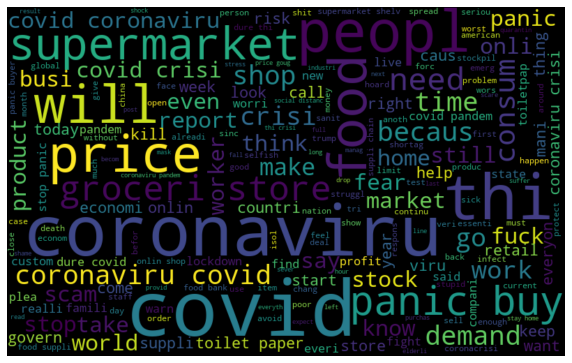

In [ ]:
#Generating a word cloud for Extremely negative tweets
from wordcloud import WordCloud

negative_words = ' '.join([text for text in corona_tweet_df['OriginalTweet'][corona_tweet_df['Sentiment'] == 'Extremely Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

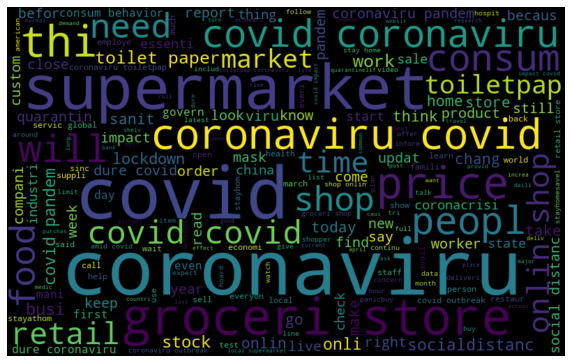

In [ ]:
#Generating a word cloud for Neutral tweets
from wordcloud import WordCloud

neutral_words = ' '.join([text for text in corona_tweet_df['OriginalTweet'][corona_tweet_df['Sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Using different algorithms to select best performing one:**
1. Decision Tree Classifier
2. Support Vector Machine Classifier
3. K Nearest Neighbour Classifier
4. Naive Bayes classifier
5. Random Forest Classifier
6. XGBoost Classifier
7. Stochastic Gradient Descent- SGD Classifier

In [ ]:
#Getting only those columns from data which will be used in modelling, this will reduce the time required for execution
useful_data= corona_tweet_df[['OriginalTweet','Sentiment']]

In [ ]:
#Dependent and independent variable
X= useful_data.OriginalTweet
y= useful_data.Sentiment

In [ ]:
#Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split 
train,test = train_test_split(useful_data,test_size = 0.2,random_state=0,stratify = useful_data.Sentiment.values)
#stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print('Train Dataset: ', train.shape)
print('Test Dataset: ', test.shape)

Train Dataset:  (32925, 2)
Test Dataset:  (8232, 2)


**Vectorization**
Vectorization is a classic approach of converting input data from its raw format (i.e. text ) into vectors of real numbers which is the format that ML models support. This approach has been there ever since computers were first built, it has worked wonderfully across various domains, and it’s now used in NLP.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.OriginalTweet.values)
X_test = vectorizer.transform(test.OriginalTweet.values)

y_train = train.Sentiment.values
y_test = test.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (32925, 26954)
X_test.shape :  (8232, 26954)
y_train.shape :  (32925,)
y_test.shape :  (8232,)


In [ ]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train)
dtree_predictions = dtree.predict(X_test)

#Performance Metrics
dtree_accuracy= accuracy_score(dtree_predictions,y_test)
dtree_precision= precision_score(dtree_predictions,y_test, average='weighted')
dtree_recall= recall_score(dtree_predictions,y_test, average='weighted')

print('Performance of Decision Tree Classifier')
print('Accuracy :' , dtree_accuracy)
print('Precision :', dtree_precision)
print('Recall :', dtree_recall)

Performance of Decision Tree Classifier
Accuracy : 0.3172983479105928
Precision : 0.7700429677972952
Recall : 0.3172983479105928


In [ ]:
#Support Vector Machine Classifier

from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

#Performance Metrics
svm_model_linear_accuracy= accuracy_score(svm_predictions,y_test)
svm_model_linear_precision= precision_score(svm_predictions,y_test, average='weighted')
svm_model_linear_recall= recall_score(svm_predictions,y_test, average='weighted')

print('Performance of Support Vector Machine Classifier')
print('Accuracy :' ,svm_model_linear_accuracy)
print('Precision :',svm_model_linear_precision)
print('Recall :',svm_model_linear_recall)

Performance of Support Vector Machine Classifier
Accuracy : 0.6280369290573372
Precision : 0.6287906414682464
Recall : 0.6280369290573372


In [ ]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

#Performance Metrics
knn_accuracy= accuracy_score(knn_predictions,y_test)
knn_precision= precision_score(knn_predictions,y_test, average='weighted')
knn_recall= recall_score(knn_predictions,y_test, average='weighted')

print('Performance of K-nearest neighbour Classifier')
print('Accuracy :' ,knn_accuracy)
print('Precision :',knn_precision)
print('Recall :',knn_recall)

Performance of K-nearest neighbour Classifier
Accuracy : 0.27101554907677355
Precision : 0.7789160597778185
Recall : 0.27101554907677355


In [ ]:
#Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_predictions= mnb.predict(X_test)

#Performance Metrics
mnb_accuracy= accuracy_score(mnb_predictions,y_test)
mnb_precision= precision_score(mnb_predictions,y_test, average='weighted')
mnb_recall= recall_score(mnb_predictions,y_test, average='weighted')

print('Performance of Naive Bayes classifier')
print('Accuracy :' ,mnb_accuracy)
print('Precision :',mnb_precision)
print('Recall :',mnb_recall)

Performance of Naive Bayes classifier
Accuracy : 0.48214285714285715
Precision : 0.5201631440726082
Recall : 0.48214285714285715


In [ ]:
#Random Forest Clssifier
from sklearn.ensemble import RandomForestClassifier
rcf= RandomForestClassifier(n_estimators=100)
rcf.fit(X_train, y_train)
rcf_predictions= rcf.predict(X_test)

#Performance Metrics
rcf_accuracy= accuracy_score(rcf_predictions,y_test)
rcf_precision= precision_score(rcf_predictions,y_test, average='weighted')
rcf_recall= recall_score(rcf_predictions,y_test, average='weighted')

print('Performance of Random Forest classifier')
print('Accuracy :' ,rcf_accuracy)
print('Precision :',rcf_precision)
print('Recall :',rcf_recall)

Performance of Random Forest classifier
Accuracy : 0.564625850340136
Precision : 0.6069854106518837
Recall : 0.564625850340136


In [ ]:
#XGBoost Classifier
import xgboost as xgb
xgbcf = MultinomialNB()
xgbcf.fit(X_train, y_train)
xgbcf_predictions= mnb.predict(X_test)

#Performance Metrics
xgbcf_accuracy= accuracy_score(xgbcf_predictions,y_test)
xgbcf_precision= precision_score(xgbcf_predictions,y_test, average='weighted')
xgbcf_recall= recall_score(xgbcf_predictions,y_test, average='weighted')

print('Performance of XGBoost classifier')
print('Accuracy :' ,xgbcf_accuracy)
print('Precision :', xgbcf_precision)
print('Recall :', xgbcf_recall)

Performance of XGBoost classifier
Accuracy : 0.48214285714285715
Precision : 0.5201631440726082
Recall : 0.48214285714285715


In [ ]:
#Stochastic Gradient Descent- SGD Classifier
from sklearn.linear_model import SGDClassifier
sgdcf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)
sgdcf.fit(X_train,y_train)

sgdcf_predictions= sgdcf.predict(X_test)

#Performance Metrics
sgdcf_accuracy= accuracy_score(sgdcf_predictions,y_test)
sgdcf_precision= precision_score(sgdcf_predictions,y_test, average='weighted')
sgdcf_recall= recall_score(sgdcf_predictions,y_test, average='weighted')

print('Performance of XGBoost classifier')
print('Accuracy :' ,sgdcf_accuracy)
print('Precision :', sgdcf_precision)
print('Recall :', sgdcf_recall)

Performance of XGBoost classifier
Accuracy : 0.5612244897959183
Precision : 0.589430693015152
Recall : 0.5612244897959183


In [ ]:
#Comparing Performance of all classifiers

models = pd.DataFrame({
    'Model': ['Decision Tree', 'Support Vector Machines', 'K Nearest Neighbour', 'Naive Bayes', 
              'Random Forest', 'XGBoost', 'Stochastic Gradient Decent'],
    'Test accuracy': [dtree_accuracy, svm_model_linear_accuracy, knn_accuracy, mnb_accuracy, rcf_accuracy, xgbcf_accuracy, sgdcf_accuracy],
    'Precision': [dtree_precision, svm_model_linear_precision, knn_precision, mnb_precision, rcf_precision, xgbcf_precision, sgdcf_precision],
    'Recall': [dtree_recall, svm_model_linear_recall, knn_recall, mnb_recall, rcf_recall, xgbcf_recall, sgdcf_recall]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy,Precision,Recall
1,Support Vector Machines,0.628037,0.628791,0.628037
4,Random Forest,0.564626,0.606985,0.564626
6,Stochastic Gradient Decent,0.561224,0.589431,0.561224
3,Naive Bayes,0.482143,0.520163,0.482143
5,XGBoost,0.482143,0.520163,0.482143
0,Decision Tree,0.317298,0.770043,0.317298
2,K Nearest Neighbour,0.271016,0.778916,0.271016
